In [ ]:
pip install qpsolvers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 KB 3.0 MB/s eta 0:00:00


In [ ]:
pip install ipythonblocks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [ ]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

In [ ]:

psource(Problem)

In [ ]:
psource(Node)

In [ ]:
psource(GraphProblem)

In [ ]:
ukraine_map = UndirectedGraph(dict(
    Kharkiv =dict(Chuguev =38, Pesochin =11, Kyiv =411),
    Kyiv=dict(Kharkiv =411, Sumy =308, Chernihiv =128, Borispol =33),
    Dnepropetrovsk =dict(Pavlograd =62, Zaporozhye =70, Nikolaev =286),
    Zaporozhye =dict(Melitopol =112),
    Kherson =dict(Nikolaev =59),
    Nikolaev =dict(Odessa =110),
    Donetsk =dict(Lugansk =126),
    Chernihiv =dict(Kharkiv =379, Sumy =251),
    Poltava =dict(Lugansk =365, Kremenchug =100),
    Odessa =dict(Dnepropetrovsk =398, Kyiv =443),
    Lugansk =dict(Kharkiv =272),
    Mirgorod =dict(Poltava =79),
    Berdyansk =dict(Donetsk =157)))

ukraine_map.locations = dict(
    Kharkiv =(1800, 2500), Kyiv=(1500, 2500), Dnepropetrovsk=(1700, 2400),
    Zaporozhye=(1750, 2350), Kherson=(1600, 2300), Nikolaev=(1550, 2300),
    Odessa=(1500, 2300), Donetsk=(1850, 2400), Lugansk=(1950, 2400),
    Chernihiv=(1550, 2550), Sumy=(1700, 2500), Poltava=(1700, 2450),
    Chuguev=(1800, 2450), Pavlograd=(1750, 2400), Melitopol=(1750, 2300),
    Pesochin=(1800, 2450), Mirgorod=(1650, 2450), Borispol=(1500, 2500),
    Kremenchug=(1650, 2450), Berdyansk=(1800, 2300))


In [ ]:
ukraine_problem = GraphProblem('Kharkiv', 'Kyiv', ukraine_map)

In [ ]:
ukraine_locations = ukraine_map.locations
print(ukraine_locations)


{'Kharkiv': (1800, 2500), 'Kyiv': (1500, 2500), 'Dnepropetrovsk': (1700, 2400), 'Zaporozhye': (1750, 2350), 'Kherson': (1600, 2300), 'Nikolaev': (1550, 2300), 'Odessa': (1500, 2300), 'Donetsk': (1850, 2400), 'Lugansk': (1950, 2400), 'Chernihiv': (1550, 2550), 'Sumy': (1700, 2500), 'Poltava': (1700, 2450), 'Chuguev': (1800, 2450), 'Pavlograd': (1750, 2400), 'Melitopol': (1750, 2300), 'Pesochin': (1800, 2450), 'Mirgorod': (1650, 2450), 'Borispol': (1500, 2500), 'Kremenchug': (1650, 2450), 'Berdyansk': (1800, 2300)}


In [ ]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in ukraine_map.locations.keys()}
node_positions = ukraine_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in ukraine_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in ukraine_map.graph_dict.items() for k2, v2 in v.items()}

ukraine_graph_data = {  'graph_dict' : ukraine_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }


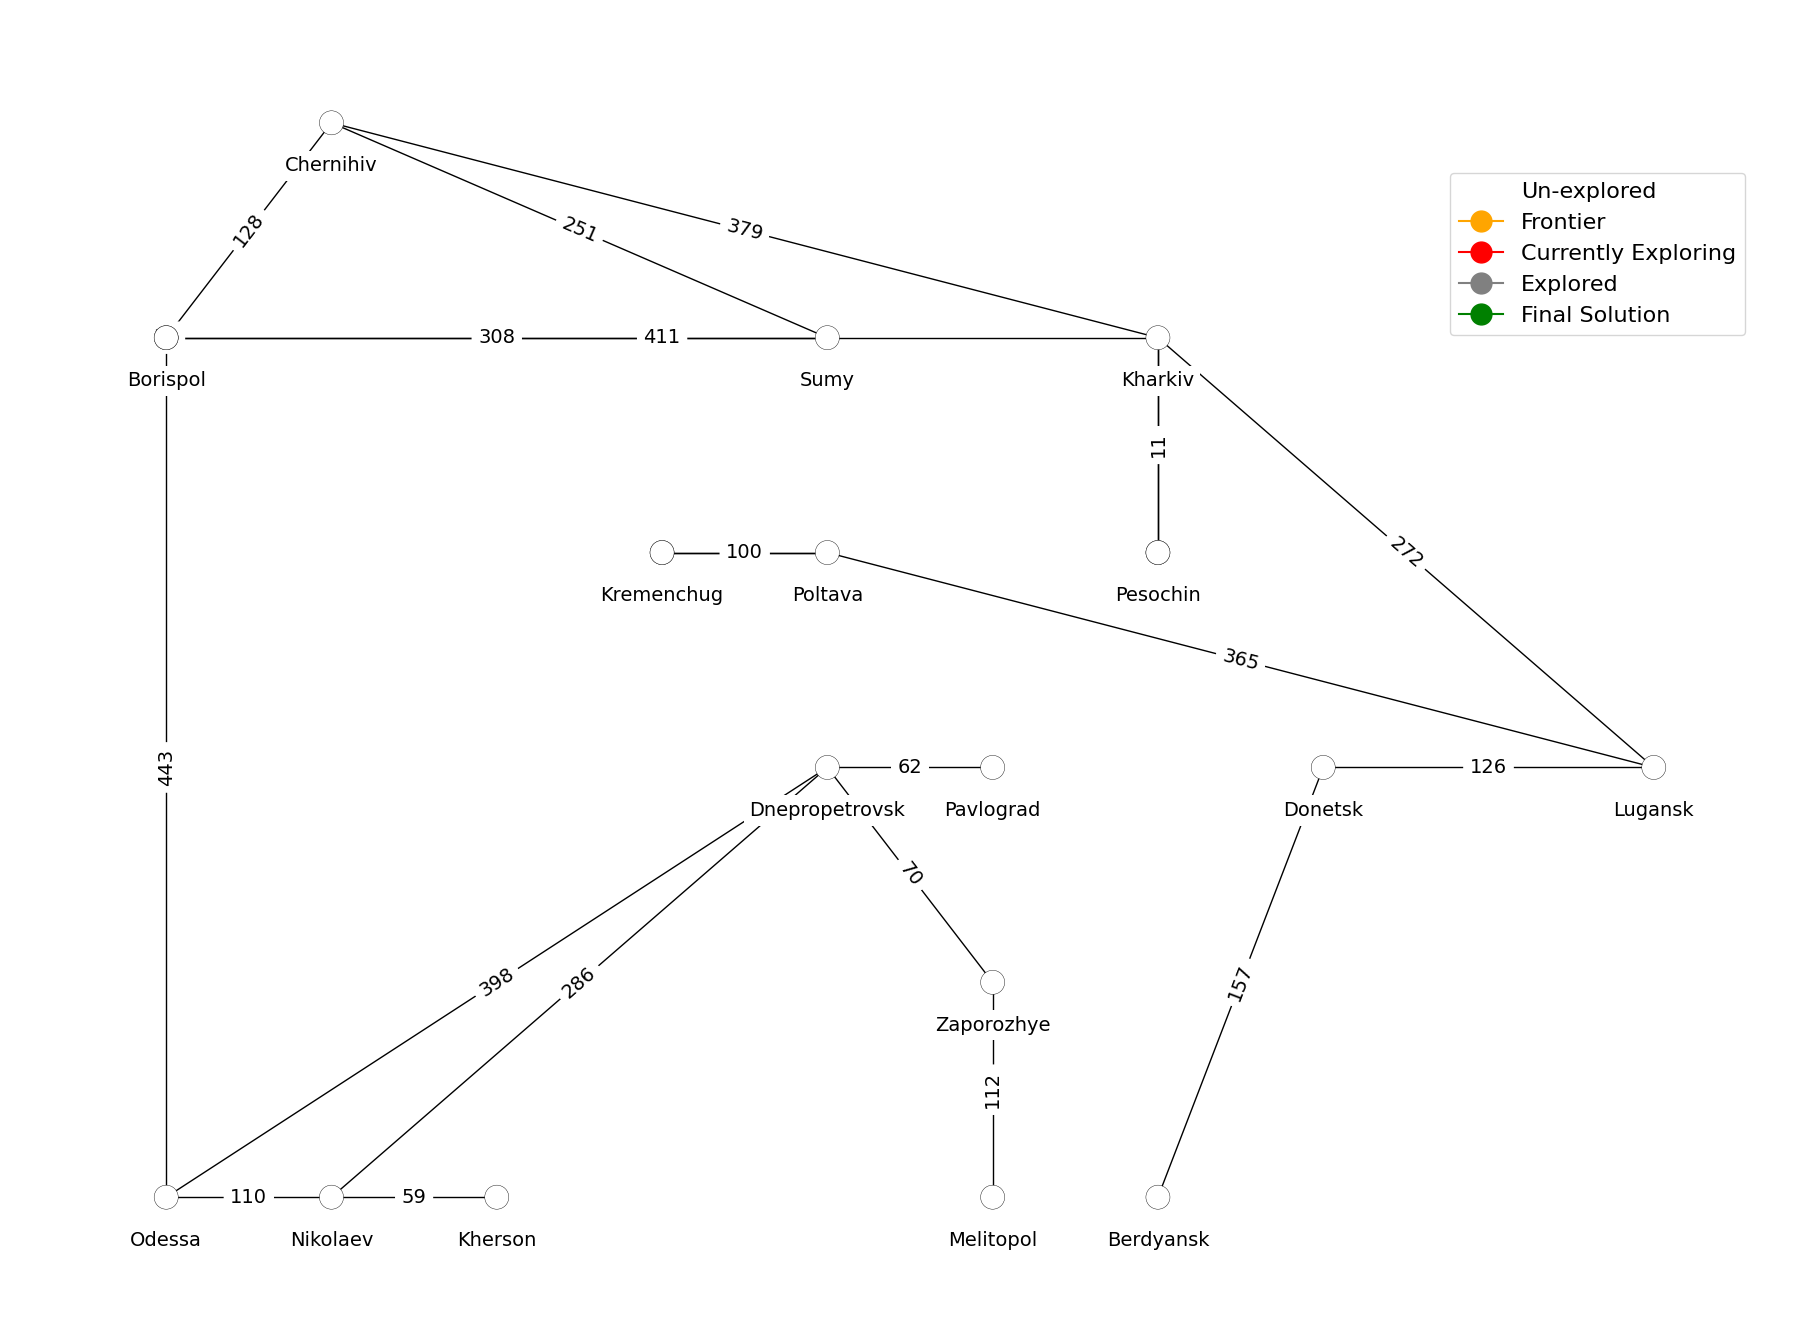

In [ ]:
show_map(ukraine_graph_data)

In [ ]:
psource(SimpleProblemSolvingAgentProgram)

In [ ]:
class vacuumAgent(SimpleProblemSolvingAgentProgram):
        def update_state(self, state, percept):
            return percept

        def formulate_goal(self, state):
            goal = [state7, state8]
            return goal  

        def formulate_problem(self, state, goal):
            problem = state
            return problem   
    
        def search(self, problem):
            if problem == state1:
                seq = ["Suck", "Right", "Suck"]
            elif problem == state2:
                seq = ["Suck", "Left", "Suck"]
            elif problem == state3:
                seq = ["Right", "Suck"]
            elif problem == state4:
                seq = ["Suck"]
            elif problem == state5:
                seq = ["Suck"]
            elif problem == state6:
                seq = ["Left", "Suck"]
            return seq

In [ ]:
state1 = [(0, 0), [(0, 0), "Dirty"], [(1, 0), ["Dirty"]]]
state2 = [(1, 0), [(0, 0), "Dirty"], [(1, 0), ["Dirty"]]]
state3 = [(0, 0), [(0, 0), "Clean"], [(1, 0), ["Dirty"]]]
state4 = [(1, 0), [(0, 0), "Clean"], [(1, 0), ["Dirty"]]]
state5 = [(0, 0), [(0, 0), "Dirty"], [(1, 0), ["Clean"]]]
state6 = [(1, 0), [(0, 0), "Dirty"], [(1, 0), ["Clean"]]]
state7 = [(0, 0), [(0, 0), "Clean"], [(1, 0), ["Clean"]]]
state8 = [(1, 0), [(0, 0), "Clean"], [(1, 0), ["Clean"]]]

a = vacuumAgent(state1)

print(a(state6)) 
print(a(state1))
print(a(state3))

Left
Suck
Right


In [ ]:
def best_first_graph_search_for_vis(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < incumbent:
                    del frontier[child]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [ ]:
def astar_search_graph(problem, h=None):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, 
                                                                lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)

In [ ]:
all_node_colors = []
ukraine_problem = GraphProblem('Kharkiv', 'Kyiv', ukraine_map)
ukraine_problem = GraphProblem('Kharkiv', 'Odessa', ukraine_map)
display_visual(ukraine_graph_data, user_input=False, 
               algorithm=astar_search_graph, 
               problem= ukraine_problem)


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…